<a href="https://colab.research.google.com/github/komorimasashi/bunka-hakaru/blob/main/R_manga_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#マンガ顔形状データを使って多変量解析（クラスタ分析と主成分分析）

##ライブラリの読み込み

In [ ]:
# Google Spread Sheetの読み込み　 --------------------------------------------------------
#パッケージのインストール
x<-installed.packages()
if(any(x[,1]== 'gsheet') == FALSE){
    system("add-apt-repository -y ppa:marutter/rrutter3.5")
    system("add-apt-repository -y ppa:marutter/c2d4u3.5") 
    system("apt-get update")
    system("apt install -y r-cran-gsheet")
}
#パッケージの読み込み
library("gsheet")

##データの読み込み

In [ ]:
#読み込むGoogleスプレッドシートのURLを設定
URL <- "https://docs.google.com/spreadsheets/d/1E_3ApzNSJhMBR2DZgcn8uCaPzL3ZAppYukbO4tWjO6U/"
 
#データの読み込み
MangaData <- gsheet2tbl(URL)
MangaData<- as.data.frame(MangaData)

In [ ]:
#漫画顔座標データ
MangaData

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,⋯,y58,y59,y60,y61,y62,y63,y64,y65,y66,y67
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Fuguta Sazae,0.522051598,1.286390,0.7430429,1.0067273,1.2013519,0.7513997,0.9865509,1.1544608,-0.40603789,-1.1898566,⋯,0.20109867,-0.214228081,-0.6509757,-0.8580441,-1.0782029,-1.1900674,-1.309072,-1.404276,-1.499480,-1.547082
Hoshi Hyuma,0.142572942,1.477416,0.4648421,0.8564625,1.2693624,0.6937574,0.8587641,1.1305193,-0.08257553,-1.4285121,⋯,0.32636036,-0.147728351,-0.6339571,-0.8790603,-1.1372804,-1.2625182,-1.387268,-1.501831,-1.542158,-1.635860
Bakabon No Papa,0.001136084,1.023570,0.5436413,0.6342401,0.7236145,0.5828191,0.6281185,0.6856610,-0.03264010,-1.0920332,⋯,0.57723104,0.041184643,-0.4872668,-0.7832037,-1.0793652,-1.2446718,-1.404242,-1.549806,-1.651753,-1.707325
Nobi Nobita,1.091504298,1.163720,1.1987941,1.2543637,1.2843919,1.1477112,1.2032808,1.2084047,-0.99991901,-1.2150839,⋯,0.09717288,-0.267469462,-0.6302001,-0.8147516,-1.0018521,-1.0931590,-1.198511,-1.320457,-1.394507,-1.420022
Oscar François de Jarjayes,0.327691404,1.491234,0.5914777,0.7918258,1.0427636,0.6268058,0.7902170,1.0295129,-0.35605311,-1.3585763,⋯,0.45364117,-0.100432947,-0.6637359,-0.9427839,-1.2467246,-1.3888629,-1.530197,-1.634594,-1.739393,-1.844192
Blackjack,0.228575433,1.401414,0.5417660,0.7839026,1.0640132,0.6300190,0.7502933,0.8695089,-0.30703563,-1.2852404,⋯,0.52948603,-0.008242458,-0.5486178,-0.8217169,-1.1097680,-1.2539933,-1.395042,-1.535562,-1.649354,-1.696327
Patalliro,0.531373442,0.925547,0.5940489,0.6986692,0.8163964,0.6107330,0.6910456,0.7844650,-0.45716889,-0.9385752,⋯,0.27165906,-0.119421191,-0.5264672,-0.7245069,-0.9339821,-1.0455077,-1.161798,-1.235909,-1.310020,-1.384131
Kinniku Suguru,0.158825142,1.246243,0.4902359,0.5892667,0.6866274,0.5237190,0.5719818,0.6210797,-0.11204831,-1.2357059,⋯,0.73737913,0.041074563,-0.6613272,-1.0192087,-1.3927050,-1.5795790,-1.763948,-1.911493,-2.071313,-2.169760
Otonashi Kyoko,0.494326612,1.340059,0.7302975,0.9268846,1.1242537,0.7495154,0.9345386,1.1087798,-0.44469909,-1.2757393,⋯,0.30160996,-0.179549814,-0.6638376,-0.9037185,-1.1506373,-1.2664428,-1.392248,-1.469452,-1.570565,-1.636205


In [ ]:
#行の命名
rownames(MangaData) <- c(
  "Fuguta Sazae",
  "Hoshi Hyuma",
  "Bakabon No Papa",
  "Nobi Nobita",
  "Oscar François de Jarjayes",
  "Blackjack",
  "Patalliro",
  "Kinniku Suguru",
  "Otonashi Kyoko",
  "Uesugi Tatsuya",
  "Nausicaa",
  "Kenshirou",
  "Son Gokuu",
  "Maruko",
  "Jonathan Joestar",
  "Sakuragi Hanamichi",
  "Monkey D. Luffy",
  "Yagami Light"
)


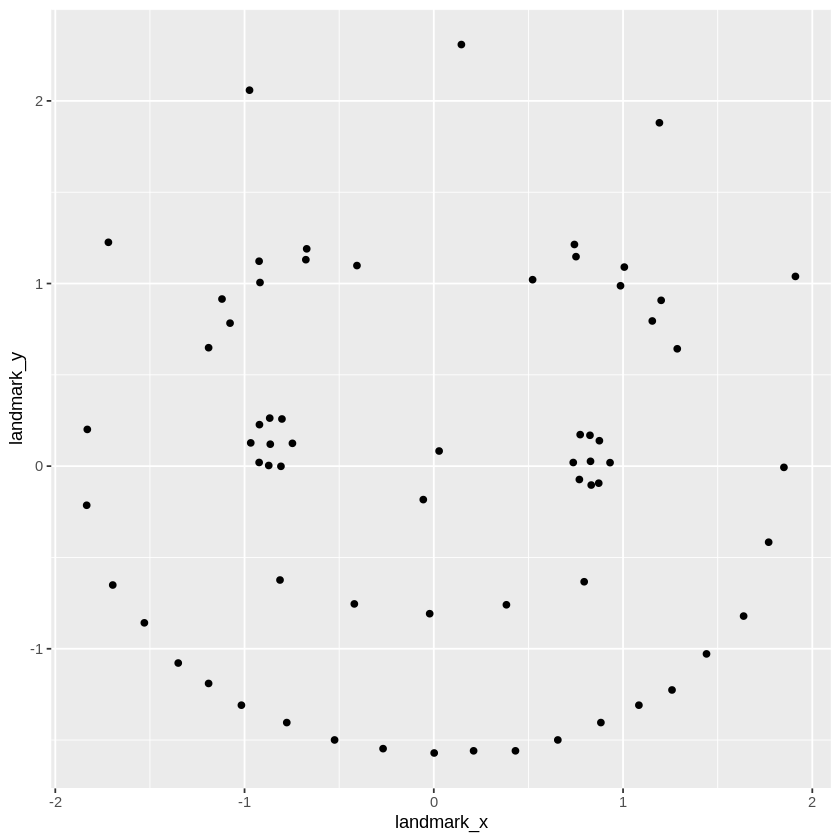

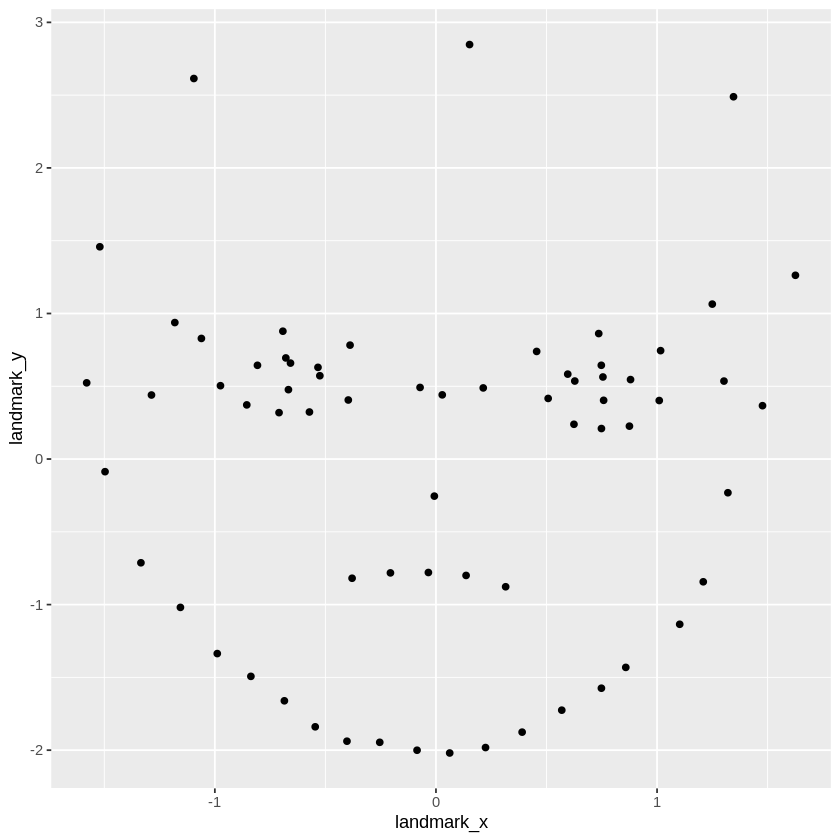

In [ ]:
#標識点を描画
library(ggplot2)

# サザエさん
landmark_x <- as.numeric(MangaData["Fuguta Sazae", c(1:(ncol(MangaData)/2))])
landmark_y <- as.numeric(MangaData["Fuguta Sazae", c((ncol(MangaData)/2)+1):ncol(MangaData)])
landmark <- data.frame(landmark_x, landmark_y)


g <- ggplot(landmark, aes(x = landmark_x, y = landmark_y))
g <- g + geom_point()
plot(g)

#標識点を描画
# ジョジョ
landmark_x <- as.numeric(MangaData["Jonathan Joestar", c(1:(ncol(MangaData)/2))])
landmark_y <- as.numeric(MangaData["Jonathan Joestar", c((ncol(MangaData)/2)+1):ncol(MangaData)])
landmark <- data.frame(landmark_x, landmark_y)

library(ggplot2)
g <- ggplot(landmark, aes(x = landmark_x, y = landmark_y))
g <- g + geom_point()
plot(g)

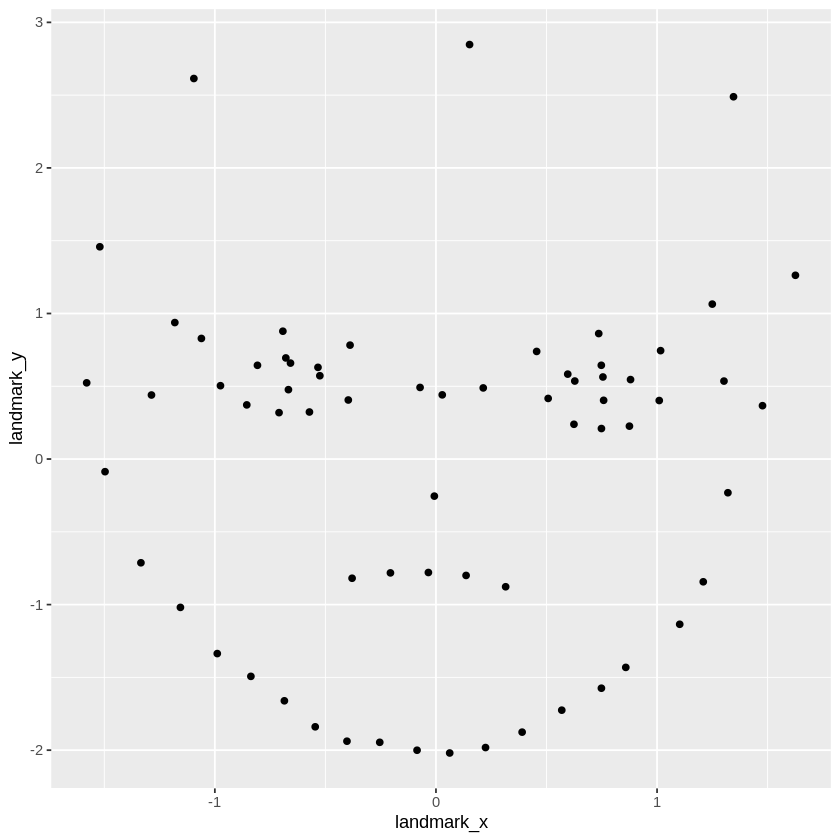

##クラスタ分析

The "ward" method has been renamed to "ward.D"; note new "ward.D2"



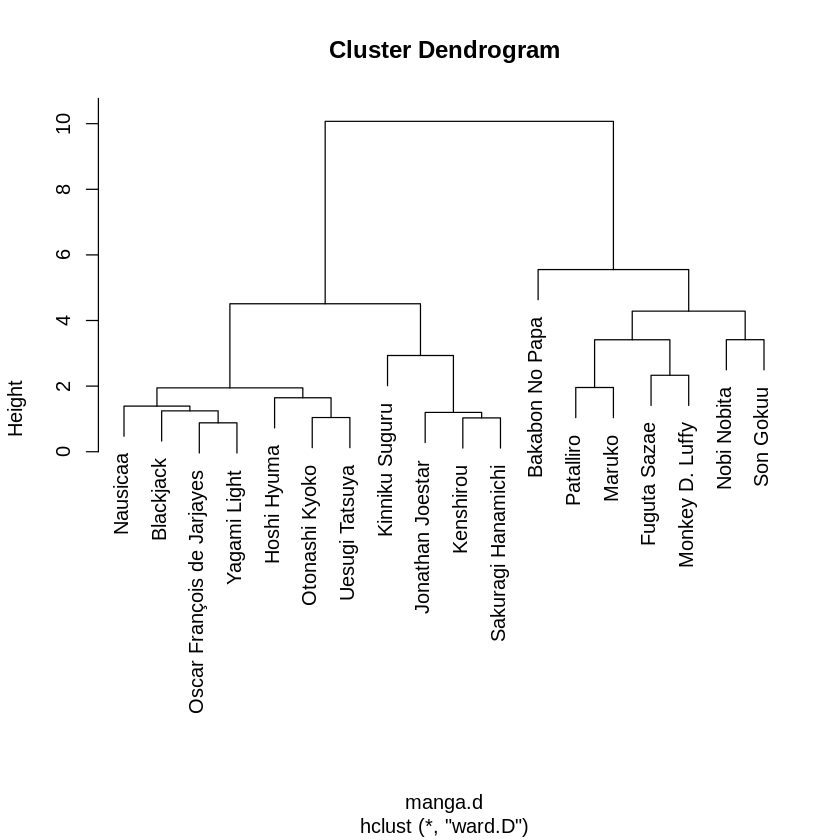

In [ ]:
#距離行列を求める
manga.d<-dist(MangaData)

#クラスタ分析；complete: 最長距離法，average: 群平均法, centroid: 重心法， ward: ウォード法
manga.hc.ward<-hclust(manga.d, method = "ward") #ウォード法

#プロット
plot(manga.hc.ward)

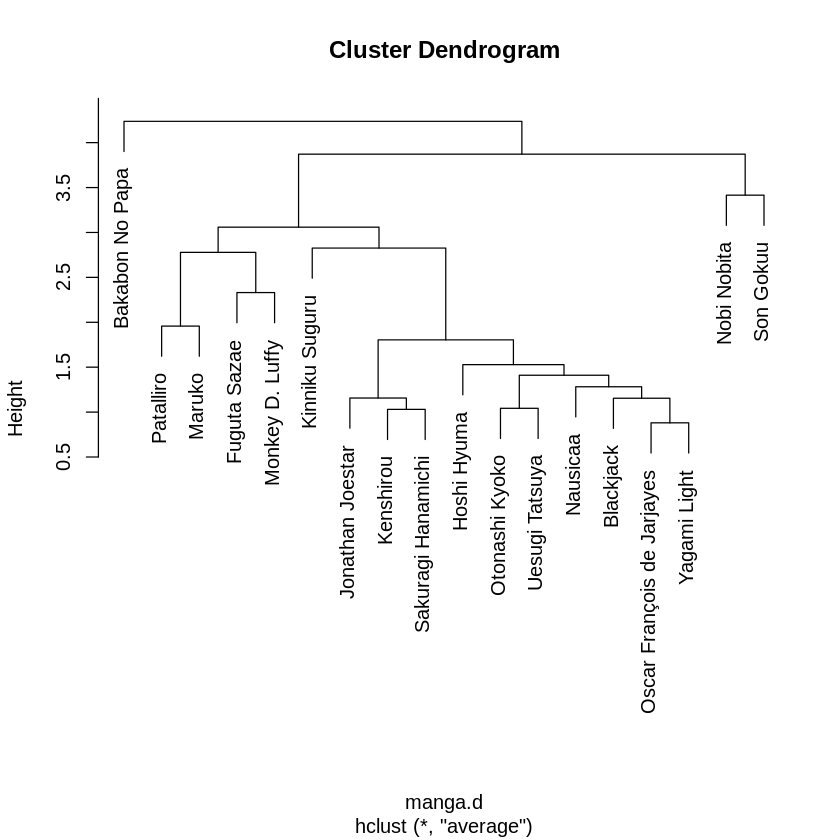

In [ ]:
#クラスタ分析；complete: 最長距離法，average: 群平均法, centroid: 重心法，ward: ウォード法
manga.hc.average<-hclust(manga.d, method = "average") #群平均法

#プロット
plot(manga.hc.average)

##主成分分析

In [ ]:
#主成分分析
pc=prcomp(MangaData,scale=F)
summary(pc)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6    PC7
Standard deviation     1.3305 1.1317 0.7738 0.55921 0.43633 0.37836 0.3401
Proportion of Variance 0.3751 0.2714 0.1269 0.06626 0.04034 0.03033 0.0245
Cumulative Proportion  0.3751 0.6465 0.7733 0.83959 0.87993 0.91026 0.9348
                           PC8     PC9   PC10    PC11    PC12    PC13    PC14
Standard deviation     0.26145 0.23886 0.2289 0.19690 0.16610 0.15874 0.12752
Proportion of Variance 0.01448 0.01209 0.0111 0.00821 0.00585 0.00534 0.00345
Cumulative Proportion  0.94925 0.96134 0.9724 0.98066 0.98650 0.99184 0.99529
                          PC15    PC16    PC17      PC18
Standard deviation     0.10463 0.08781 0.05993 4.791e-16
Proportion of Variance 0.00232 0.00163 0.00076 0.000e+00
Cumulative Proportion  0.99761 0.99924 1.00000 1.000e+00

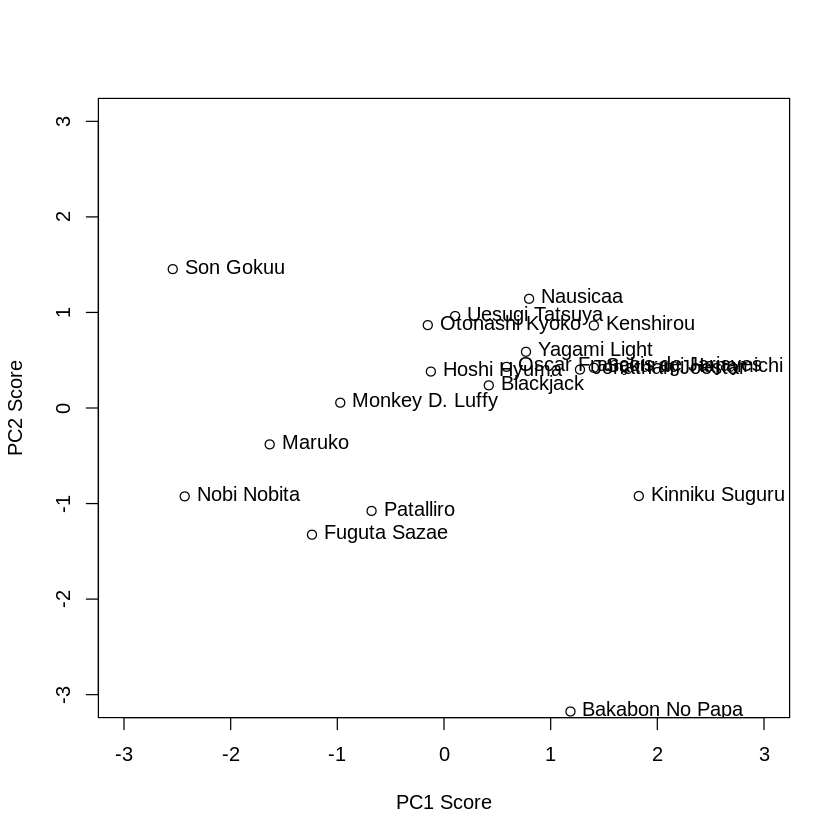

In [ ]:
#作図
plot(pc$x[,1],pc$x[,2], xlab="PC1 Score", ylab="PC2 Score", xlim=c(-3,3),ylim=c(-3,3))
text(pc$x[,1],pc$x[,2],rownames(MangaData),cex=1, pos=4)